# 2022년 가을 빅데이터물리학 기말고사
2022년 가을 빅데이터물리학 기말고사입니다. 중간고사와 같은 방식으로, 아래 질문들에 대한 답을 작성 해 제출 해 주세요. 필요시 답을 작성하기 위해 주어진 코드 영역이나 텍스트 영역외에 직접 추가 해 작성하셔도 괜찮습니다.

패키지 사용은 numpy, scipy, matplotlib, pytorch를 기본으로 합니다. 만약 코드 작성시 필요한 추가 패키지가 있으면 자유롭게 사용하셔도 됩니다. 단, ipynb 파일 내에 설치 과정도 같이 포함 해 주세요 (!pip install ....)  

- 제출 기한: 12월 21일 수요일 밤 11시 59분, 목요일 되기 전까지
- 제출 방법: e-campus에 ipynb 파일 제출

답안 작성을 위해 각종 교재, 인터넷 문서, 동료와 토론 모두 가능합니다만, 본인의 능력으로 직접 답안을 작성할 수 있도록 합시다. 

주어진 문제를 프로그램 코드로 구현하여 해결할 수 있는지에 집중해 평가합니다. 물리 공식 자체에는 너무 고민하지 않으셔도 됩니다.

코드 작성과 실행 결과를 모두 넣어 .ipynb 파일로 저장해 제출 해 주시면 됩니다. google colab이라면 아래 화면 캡쳐한 것과 같이 파일->다운로드->.ipynb 다운로드 선택하셔서 결과물을 저장해 제출하시면 됩니다.

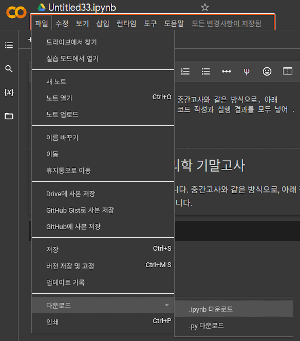

## 문제 0-0 (답안 작성 예시, 배점없음)
자신의 학번과 이름을 10번 반복해 출력하는 파이썬 코드를 작성하세요.

In [1]:
### 코드 작성하기
"""
for i in range(10):
  print("01234567") ## <- 여기에 본인의 학번 넣으세요
  print("고정환") ## <- 여기에 본인의 이름을 넣으세요.
"""
## jupyter notebook환경에서 실행할때는 shift+enter 키 누르세요.
for i in range(10):
  print("2017103274\n최정훈")

2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈
2017103274
최정훈


## 문제 0 (손풀기, 10점)
y = (sin(ax)/x)<sup>2</sup> 함수의 커브를 그리세요. a 값이나 x 값을 범위는 원하는대로 임의로 정하시면 됩니다.

- matplotlib이나 numpy를 이용할 수 있습니다. 다른 package를 사용하셔도 괜찮습니다.
- 아래 코드 영역에서 빠진 내용이나 틀린 내용을 수정해 코드를 완성하세요. (완전히 삭제하고 새로 작성하셔도 됩니다.)

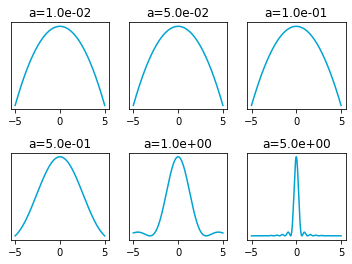

In [2]:
### 코드 작성하기
import numpy as np
import matplotlib.pyplot as plt

def f(x, a=0.01):
  return (np.sin(a*x)/x)**2

if __name__=="__main__":
  a = (1e-2, 5e-2, 1e-1, 5e-1, 1, 5)
  x = np.linspace(-5, 5, 10000)

  plt.subplots_adjust(hspace=0.5)
  for i, aa in enumerate(a, start=1):
    y=f(x, aa)
    ax=plt.subplot(2, 3, i)
    ax.set_title("a=%.1e" %aa)
    plt.xticks([-5, 0, 5]); plt.yticks([])
    plt.plot(x, y, color="#00a3d2")
  plt.show()

## 문제 1 (10점)
x<sub>1</sub> = 0 에 한 변의 길이가 1mm인 정각형 모양의 광원을 세워놓고, x<sub>2</sub> = 1m 위치에 한 변의 길이가 10m인 정사각형 모양의 스크린을 세웠습니다. 회절이나 간섭 효과를 고려하지 않았을 때 스크린에서 빛의 밝기가 어떻게 될지 몬테카를로 방법을 이용해 2d histogram으로 그려보세요.

- 힌트: x<sub>1</sub> = 0, -0.5mm < y<sub>1</sub> < 0.5mm, -0.5mm < z<sub>1</sub> < 0.5mm 범위의 랜덤한 위치에 있는 점광원들을 만들고 빛이 임의의 각도로 방사되어 x=1m, -10m<y<10m, -10m<z<10m에 도달하는 갯수를 세어 보세요

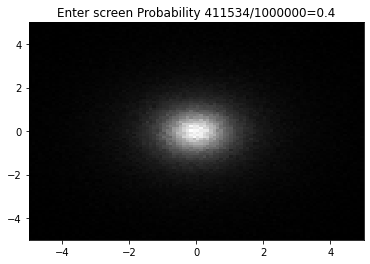

In [3]:
import numpy as np
import matplotlib.pyplot as plt

if __name__=="__main__":
  N = 1000000
  sourceSize = 0.001
  screenSize = 10
  distance=1

  ### 코드 작성하기
  yy=[]; zz=[]

  for i in range(N):
    y, z=np.random.uniform(-sourceSize/2, sourceSize/2, 2)
    # theta[-pi, pi] & phi[-pi, pi] 에 대한 Uniform 한 분포는 극 표면에 더 밀집된 분포가 형성된다.
    # 가우시안 분포에서 추출된 x, y, z에 대해서 1/(sqrt(x**2+y**2+z**2))*vector(x, y, z)는 구에서 균등한 분포를 형성한다고 알려져 있다.
    # Muller 1959, Marsaglia 1972
    kx, ky, kz=np.random.normal(0.0, 1.0, 3)
    size=np.sqrt(kx**2+ky**2+kz**2)
    if(kx<=0): continue   # 반대 방향 진행
    tar_y=y+(distance/kx)*ky    # x==distance 까지 벡터 확장
    tar_z=z+(distance/kx)*kz
    if(tar_y>=-screenSize/2 and tar_y<=screenSize/2 and tar_z>=-screenSize/2 and tar_z<=screenSize/2):
      yy.append(tar_y); zz.append(tar_z)    # 확장 vector가 스크린을 통과할 때만 추가

  assert(len(yy)==len(zz))
  plt.hist2d(yy, zz, bins=100, cmap='gray', range=((-5, 5), (-5, 5)));
  plt.title("Enter screen Probability %d/%d=%.1f" %(len(yy), N, len(yy)/N))
  #plt.hist(yy, bins=100);

스크린 까지의 거리 distance=1m 스크린 높이=5m<br/>
atan(5): 각도는 대략 78도
(78*2)/360*100=43.33%로 위의 결과와 유사하다.<br/><br/>
위의 수식은 점광원으로 가정한 값. 위의 Monte Carlo Simulation은 사각형 광원으로 진행하였기에 약간의 오차가 존재한다.<br/>

## 문제 2 (10점)

문제 1에서 광원의 크기를 1mm, 10mm, 100mm, ... 로 10배씩 늘렸을 때 스크린에 나타나는 이미지를 비교해 보세요. 

- 힌트: 여러 그림을 겹쳐 그려보기 위해 이미지를 x축상으로 projection해서 그려보면 비교하기 용이합니다

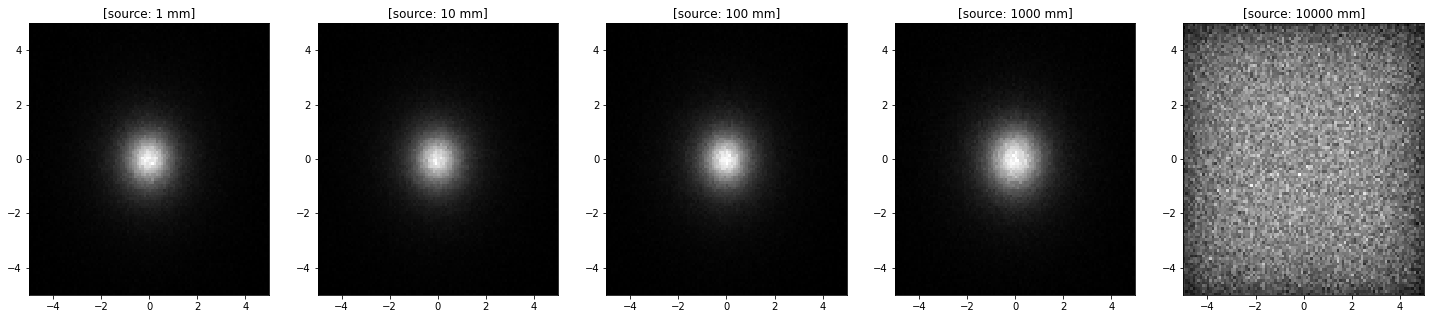

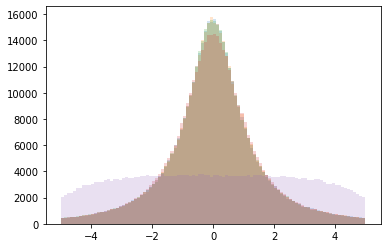

In [4]:
### 코드 작성하기
"""
for i in [1, 10,]:
  plt.hist(yy)
"""
import numpy as np
import matplotlib.pyplot as plt

if __name__=="__main__":
  N = 1000000
  sourceSizes = [0.001, 0.01, 0.1, 1, 10]
  screenSize = 10
  distance=1
  yyy=[]; zzz=[]

  for sourceSize in sourceSizes:
    yy=[]; zz=[]
    for i in range(N):
      y, z=np.random.uniform(-sourceSize/2, sourceSize/2, 2)
      # theta[-pi, pi] & phi[-pi, pi] 에 대한 Uniform 한 분포는 극 표면에 더 밀집된 분포가 형성된다.
      # 가우시안 분포에서 추출된 x, y, z에 대해서 1/(sqrt(x**2+y**2+z**2))*vector(x, y, z)는 구에서 균등한 분포를 형성한다고 알려져 있다.
      kx, ky, kz=np.random.normal(0.0, 1.0, 3)
      size=np.sqrt(kx**2+ky**2+kz**2)
      if(kx<=0): continue
      tar_y=y+(distance/kx)*ky
      tar_z=z+(distance/kx)*kz
      if(tar_y>=-screenSize/2 and tar_y<=screenSize/2 and tar_z>=-screenSize/2 and tar_z<=screenSize/2):
        yy.append(tar_y); zz.append(tar_z)
    assert(len(yy)==len(zz))
    yyy.append(yy); zzz.append(zz)

  plt.figure(figsize=(25, 5))
  for i in range(len(sourceSizes)):
    ax=plt.subplot(1, 5, i+1)
    plt.hist2d(yyy[i], zzz[i], bins=100, cmap='gray', range=((-5, 5), (-5, 5)))
    ax.set_title("[source: %d mm]" %(sourceSizes[i]*1000))

  plt.show()
  print("\n", end="", flush=True)

  for i in range(len(sourceSizes)):
    plt.hist(yyy[i], bins=100, alpha=0.2)
  
  plt.show()

## 문제 3 (10점)
광원에서 발생한 빛이 레이저와 같이 단파장으로 phase가 맞는 빛이 발생한다면 회절, 간섭 현상을 볼 수 있습니다. 이를 가장 쉽게 구현할 수 있는 방법 중 하나는 슬릿을 하나 준비해 단파장의 평면파를 쏘아 스크린에 나타나는 이미지를 관찰하는 것 입니다.

구멍 크기가 0.1mm인 단일 슬릿에 650nm의 빛을 쏘았을 때 나타나는 회절 무늬를 몬테카를로 방법을 이용해 그려보세요. 스크린의 크기와 위치는 회절 무늬가 가장 잘 보이는 값으로 조절 해 보세요.

- 조건1: 3차원 문제로 풀지 않고, 단일 슬릿의 구멍이 세로로 매우 길다고 가정해도 됩니다. (3차원으로 해도 됩니다)
- 조건2: 회절무늬 공식을 그대로 가져다 적을 경우 풀이로 인정하지 않습니다.

- 힌트: 간격 0.1mm 안에서 많은 수의 점광원이 uniform하게 분포하게 한 다음, 여기서 발생한 빛이 스크린의 각 위치에 도달했을 때 전기장과 자기장 성분을 각각 계산해 더하세요. 전기장과 자기장 성분은 cos(kx) 와 sin(kx) 로 나누어 적으시면 되고, 빛의 세기는 E<sup>2</sup>+B<sup>2</sup>으로 얻으면 됩니다


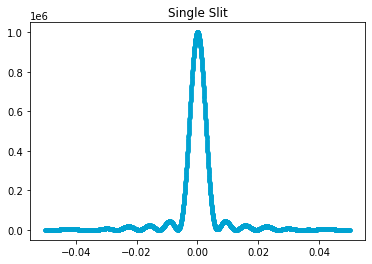

In [ ]:
"""
r0 = 1e-3
r1 = 0.1
x1 = 10
lamb = 650e-9

y1s = np.linspace(-r1, r1, 1000)
amplRe = np.zeros(y1s.shape)
amplIm = np.zeros(y1s.shape)

...

plt.plot(y1s, (amplRe**2 + amplIm**2), '.-')
"""
import numpy as np
import matplotlib.pyplot as plt

if __name__=="__main__":
  r0 = 1e-4
  r1 = 0.05
  lamb = 650e-9

  N1=1000
  N2=10000

  distance=1

  # uniform distribution
  #y1v=np.linspace(-r0/2, r0/2, N1)
  # uniform Monte Carlo
  y1v=np.random.uniform(-r0/2, r0/2 ,N1)
  y1s = np.linspace(-r1, r1, N2)
  amplRe = np.zeros(y1s.shape)
  amplIm = np.zeros(y1s.shape)
  k=2*np.pi/lamb

  for i in range(N1):
    for j in range(N2):
      length=(distance**2+(y1v[i]-y1s[j])**2)**(1/2)
      amplRe[j]+=np.cos(k*length)
      amplIm[j]+=np.sin(k*length)

  plt.plot(y1s, (amplRe**2 + amplIm**2), '.-', color="#00a3d2")
  plt.title("Single Slit")
  plt.show()

  x_for_q4=y1s
  y_for_q4=amplRe**2+amplIm**2

## 문제 4 (20점)
단일 슬릿의 회절무늬는 I=I<sub>0</sub>(sin kx / kx)<sup>2</sup> 의 공식을 따르는 것으로 알려져 있습니다. 위에서 얻은 "데이터"에 대해 위 공식과 잘 맞는지, 이때 k값이 어떻게 되는지 least-squares 방법을 이용해 구하세요.

- 조건 1: Gradient를 직접 계산해 parameter를 업데이트 하는 방식으로 GD방법을 직접 구현하세요.
- 조건 2: curve_fit등 fitter 패키지를 사용하지 **않고**, numpy ndarray등을 이용하는 수준에서 직접 구현하세요. pytorch를 사용하더라도, optimizer나 autograd를 사용하지 않고 직접 GD를 구현하세요.

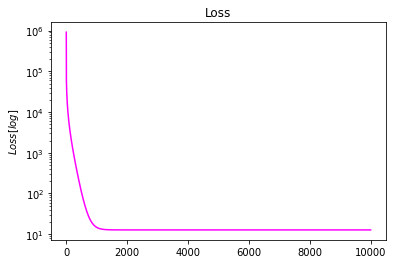

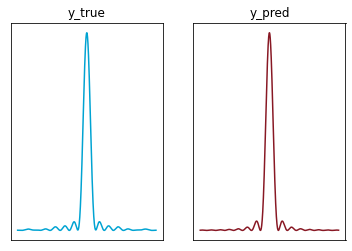

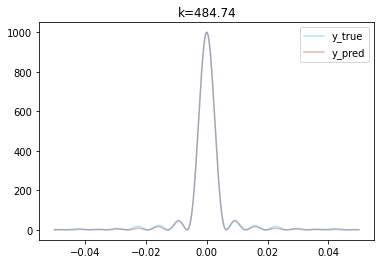

In [ ]:
# Need to get x_for_q4 y_for_q4 from Q3
x=x_for_q4
y=y_for_q4
# normalize y_max as 1e3
nrml=1e3
amplitude=np.max(y)
y/=amplitude
y*=nrml
amplitude=nrml

### 구현하기
def intensity(x, amplitude, k):
  return amplitude*(np.sin(k*x)/(k*x))**2
  ## return amplitude*np.sinc(k*x)

"""
def dI_dk(k):
  global x, amplitude
  num=2*amplitude*np.sin(k*x)*(k*x*np.cos(k*x)-np.sin(k*x))
  denum=k**3*x**2
  return num/denum
"""

# Gradient with Three point Taylor expension
def df_dk(func, k):
  global x, amplitude
  h=1e-8
  return (func(x, amplitude, k+h)-func(x, amplitude, k-h))/(2*h)

# LSQ=1/N*SUM((y_pred-y_true)**2)
def LSE(k):
  global x, y, intensity, amplitude
  lse=np.mean((intensity(x, amplitude, k)-y)**2)
  return lse

if __name__=="__main__":
  learning_rate = 1e-2
  lsq_all = []

  k=1
  for i in range(10000):
    lsq=LSE(k)
    # grad = (2*(intensity(x, amplitude, k)-y)*dI_dk(k)).mean()
    grad=np.mean(2*(intensity(x, amplitude, k)-y)*df_dk(intensity, k))
    k-= grad*learning_rate
    lsq_all.append(lsq)

  plt.plot(lsq_all, color="#ff00ff")
  plt.title("Loss")
  plt.yscale("log"); plt.ylabel(f"$Loss[log]$")
  plt.show()
  print("\n", end="", flush=True)

  y_pred=intensity(x, amplitude, k)

  ax=plt.subplot(121)
  ax.plot(x, y, color="#00a3d2")
  ax.set_title("y_true")
  plt.xticks([]); plt.yticks([])
  ax=plt.subplot(122)
  ax.plot(x, y_pred, color="#881824")
  ax.set_title("y_pred")
  plt.xticks([]); plt.yticks([])
  plt.show()
  print("\n", end="", flush=True)

  plt.plot(x, y, color="#00a3d2", alpha=0.3, label="y_true")
  plt.plot(x, y_pred, color="#881824", alpha=0.3, label="y_pred")
  plt.title("k=%.2f" %k)
  plt.legend()
  plt.show()

## 문제 5 (10점)
단일 슬릿을 두 개 나란히 놓아 단파장 빛을 쏘면 간섭무늬가 나타납니다. 문제 3에서 했던 것과 같은 방식으로 간섭무늬가 나타나는지 확인해 보세요.

- 조건: 슬릿 구멍의 크기는 0.1mm로 하고 슬릿 사이의 간격은 1mm, 빛의 파장은 650mm.
- 힌트: 문제 3의 코드에서 광원의 위치를 바꾸는 정도의 변경 수준에서 구현할 수 있습니다.

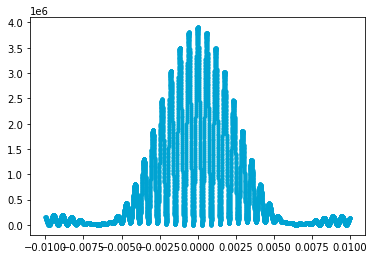

In [5]:
"""
r0 = 1e-4
d0 = 1e-3
r1 = 0.02
x0 = 0
x1 = 1
lamb = 650e-9

y1s = np.linspace(-r1, r1, 1000)
amplRe = np.zeros(y1s.shape)
amplIm = np.zeros(y1s.shape)
"""

import numpy as np
import matplotlib.pyplot as plt

if __name__=="__main__":
  r0 = 1e-4
  d0 = 1e-3
  r1 = 0.01
  x1 = 10
  lamb = 650e-9

  N1=1000
  N2=10000

  distance=1

  #y1v=np.linspace(0, r0, N1)
  #y2v=np.linspace(0, r0, N1)
  y1v=np.random.uniform(0, r0, N1)
  y2v=np.random.uniform(0, r0, N1)
  y1s = np.linspace(-r1, r1, N2)
  amplRe = np.zeros(y1s.shape)
  amplIm = np.zeros(y1s.shape)
  k=2*np.pi/lamb

  for i in range(N1):
    for j in range(N2):
      upy=d0/2+y1v[i]; downy=-d0/2-y2v[i]
      up_length=(distance**2+(upy-y1s[j])**2)**(1/2)
      down_length=(distance**2+(downy-y1s[j])**2)**(1/2)

      amplRe[j]+=(np.cos(k*up_length)+np.cos(k*down_length))
      amplIm[j]+=(np.sin(k*up_length)+np.sin(k*down_length))

  plt.plot(y1s, (amplRe**2 + amplIm**2), '.-', color="#00a3d2")
  #plt.xlim([-r1, r1])
  plt.show()

  x_for_q6=y1s
  y_for_q6=amplRe**2+amplIm**2

## 문제 6 (10점)
이중슬릿에서의 빛의 세기는 I=I<sub>0</sub> (sin(kx)/kx)<sup>2</sup> cos<sup>2</sup>(βx) 와 같은 식으로 주어집니다. 즉, 회절에 따른 envelop 과 간섭에 따른 cos<sup>2</sup>(βx) 의 곱으로 나타납니다. least squares방법으로 fitting하고 이때 k, β를 구하세요.

- 조건: 각종 fitting package사용하셔도 됩니다.

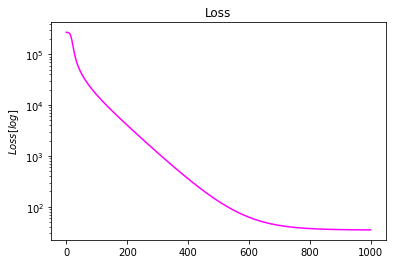

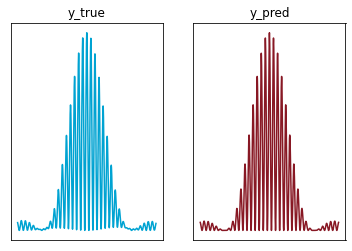

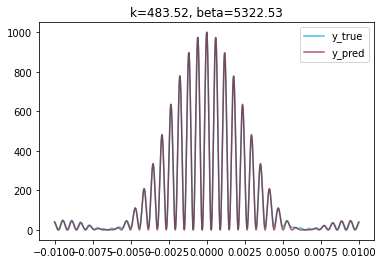

In [6]:
# Gradient Descent
# Need to get y_for_q6 from Q5
x=x_for_q6
y=y_for_q6
amplitude=np.max(y)
# normalize y_max as 1e3
nrml=1e3
y/=amplitude
y*=nrml
amplitude=nrml


### 구현하기
def intensity(k, beta):
  global amplitude, x
  return amplitude*(np.sin(k*x)/k/x)**2*(np.cos(beta*x))**2

"""
def dI_dk(k):
  global x, amplitude
  num=2*amplitude*np.cos(beta*x)**2*np.sin(k*x)*(k*x*np.cos(k*x)-np.sin(k*x))
  denum=k**3*x**2
  return num/denum

def dI_dbeta(beta):
  global x, amplitude
  num=2*amplitude*np.sin(beta*x)*np.cos(beta*x)*np.sin(k*x)**2
  denum=k**2*x
  return num/denum
"""

def df_dx(func, k, beta):
  global amplitude, x
  h=1e-8
  df_dk=(func(k+h, beta)-func(k-h, beta))/(2*h)
  df_dbeta=(func(k, beta+h)-func(k, beta-h))/(2*h)
  return df_dk, df_dbeta

# LSQ=1/N*SUM((y_pred-y_true)**2)
def LSE(k, beta):
  global x, y, intensity
  lse=np.mean((intensity(k, beta)-y)**2)    # use mean
  return lse

if __name__=="__main__":
  learning_rate = 1e-2
  lsq_all = []

  # beta가 Local Minimum에 빠지지 않기 위해서는 beta 초기화를 해와 충분히 가깝게 해야함
  k=10; beta=5000
  for i in range(1000):
    lsq=LSE(k, beta)
    # grad_k=(2*(intensity(k, beta)-y)*dI_dk(k)).mean()
    # grad_beta=(2*(intensity(k, beta)-y)*dI_dbeta(beta)).mean()
    dk, dbeta=df_dx(intensity, k, beta)
    grad_k=np.mean(2*(intensity(k, beta)-y)*dk)
    grad_beta=np.mean(2*(intensity(k, beta)-y)*dbeta)
    k-=grad_k*learning_rate
    beta-=grad_beta*learning_rate
    lsq_all.append(lsq)

  plt.plot(lsq_all, color="#ff00ff")
  plt.title("Loss")
  plt.yscale("log"); plt.ylabel(f"$Loss[log]$")
  plt.show()
  print("\n", end="", flush=True)

  y_pred=intensity(k, beta)
  ax=plt.subplot(121)
  ax.plot(x, y, color="#00a3d2")
  ax.set_title("y_true")
  plt.xticks([]); plt.yticks([])
  ax=plt.subplot(122)
  ax.plot(x, y_pred, color="#881824")
  ax.set_title("y_pred")
  plt.xticks([]); plt.yticks([])
  plt.show()
  print("\n", end="", flush=True)
  
  plt.plot(x, y, color="#00a3d2", alpha=0.7, label="y_true")
  plt.plot(x, y_pred, color="#881824", alpha=0.7, label="y_pred")
  plt.title("k=%.2f, beta=%.2f" %(k, beta))
  plt.legend()
  plt.show()

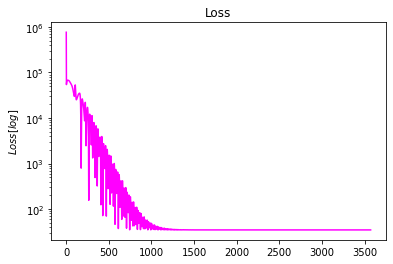

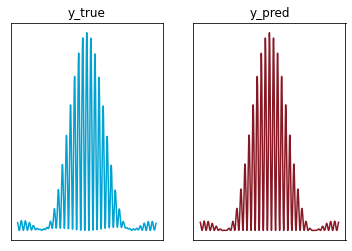

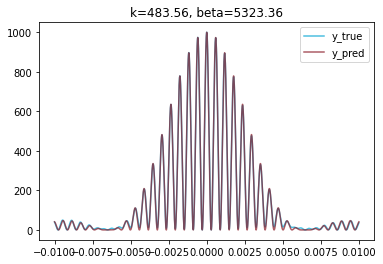

In [7]:
# ADAM
# Need to get y_for_q6 from Q5
x=x_for_q6
y=y_for_q6
amplitude=np.max(y)
# normalize y_max as 1
nrml=1e3
y/=amplitude
y*=nrml
amplitude=nrml

### 구현하기
"""
def dI_dk(k):
  global x, amplitude
  num=2*amplitude*np.cos(beta*x)**2*np.sin(k*x)*(k*x*np.cos(k*x)-np.sin(k*x))
  denum=k**3*x**2
  return num/denum

def dI_dbeta(beta):
  global x, amplitude
  num=2*amplitude*np.sin(beta*x)*np.cos(beta*x)*np.sin(k*x)**2
  denum=k**2*x
  return num/denum
"""
def intensity(k, beta):
  global amplitude, x
  return amplitude*(np.sin(k*x)/k/x)**2*(np.cos(beta*x))**2

def df_dx(func, vari):
  global amplitude, x
  k=vari[0]; beta=vari[1]
  h=1e-8
  df_dk=(func(k+h, beta)-func(k-h, beta))/(2*h)
  df_dbeta=(func(k, beta+h)-func(k, beta-h))/(2*h)
  return df_dk, df_dbeta

# LSQ=1/N*SUM((y_pred-y_true)**2)
def LSE(k, beta):
  global x, y, intensity
  lse=np.mean((intensity(k, beta)-y)**2)    # use mean
  return lse

def dL_dx(vari):
  global df_dx, intensity, x, y
  k=vari[0]; beta=vari[1]
  df=df_dx(intensity, vari)
  dL_dk=np.mean(2*(intensity(k, beta)-y)*df[0])
  dL_dbeta=np.mean(2*(intensity(k, beta)-y)*df[1])
  return np.array([dL_dk, dL_dbeta])

def adam(df, x, max_iter=1e4, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-7, thrs=1e-6):
  global LSE
  m=np.array([0, 0]); v=np.array([0, 0])  # moment 1, moment 2
  lse=[]
  t=1
  while t<max_iter:
    lse.append(LSE(x[0], x[1]))
    gx=df(x)
    m=beta1*m+(1-beta1)*gx
    v=beta2*v+(1-beta2)*gx**2
    mh=m/(1-beta1**t)
    vh=v/(1-beta2**t)
    x_new=x-alpha*mh/(vh**(1/2)+epsilon)
    if(sum(abs(x-x_new))<thrs): break
    x=x_new
    t+=1
  return x, lse

if __name__=="__main__":
  k=10; beta=10
  vari=[k, beta]
  # beta에 대한 Local Minimum이 많음(alpha를 크게 줘서 step을 크게 학습)
  vari, lse=adam(dL_dx, vari, alpha=3e2, beta1=0.99, beta2=0.9999)
  k=vari[0]; beta=vari[1]

  plt.plot(lse, color="#ff00ff")
  plt.title("Loss")
  plt.yscale("log"); plt.ylabel(f"$Loss[log]$")
  plt.show()
  print("\n", end="", flush=True)

  y_pred=intensity(k, beta)
  ax=plt.subplot(121)
  ax.plot(x, y, color="#00a3d2")
  ax.set_title("y_true")
  plt.xticks([]); plt.yticks([])
  ax=plt.subplot(122)
  ax.plot(x, y_pred, color="#881824")
  ax.set_title("y_pred")
  plt.xticks([]); plt.yticks([])
  plt.show()
  print("\n", end="", flush=True)
  
  plt.plot(x, y, color="#00a3d2", alpha=0.7, label="y_true")
  plt.plot(x, y_pred, color="#881824", alpha=0.7, label="y_pred")
  plt.title("k=%.2f, beta=%.2f" %(k, beta))
  plt.legend()
  plt.show()

## 문제 7 (20점)
위에서 만든 간섭무늬를 입력으로 넣었을 때 I<sub>0</sub>, k, β를 구하는 머신러닝 모델을 구현하세요.

- 조건 1: 성능이 좋지 않아도 구현 자체에 성공했는지 여부만 확인.
- 조건 2: 각종 패키지 사용 가능 (pytorch, tensorflow, scikit-learn, etc, etc)
- 조건 3: 딥러닝이 아닌 다른 머신러닝 모델이어도 됨.

 Trained: 100000/100000




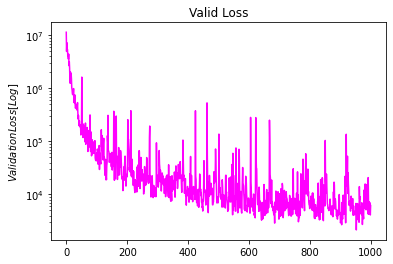

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class DNN(torch.torch.nn.Module):
  def __init__(self, xsize):
    super(DNN, self).__init__()
    self.xsize=xsize

    self._convsize=1024
    self.fc_front=torch.nn.Sequential(
        torch.nn.Linear(xsize, self._convsize),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5)
    )
    self.fc1=torch.nn.Sequential(
        torch.nn.Conv1d(1, 1, 512, 1, "same"),
        torch.nn.ReLU()
    )
    self.fc2=torch.nn.Sequential(
        torch.nn.Conv1d(1, 1, 128, 1, "same"),
        torch.nn.ReLU()
    )
    self.fc3=torch.nn.Sequential(
        torch.nn.Conv1d(1, 1, 32, 1, "same"),
        torch.nn.ReLU()
    )
    self.fc4=torch.nn.Sequential(
        torch.nn.Conv1d(1, 1, 8, 1, "same"),
        torch.nn.ReLU()
    )
    self.fc5=torch.nn.Sequential(
        torch.nn.Conv1d(1, 1, 2, 1, "same"),
        torch.nn.ReLU()
    )
    self.fc_rear=torch.nn.Sequential(
        torch.nn.Linear(5*self._convsize, 128),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(128, 3)
    )
  
  def forward(self, x):
    y1=self.fc_front(x.view(-1, self.xsize))
    y2=torch.cat((self.fc1(y1), self.fc2(y1), self.fc3(y1), self.fc4(y1), self.fc5(y1)), dim=1)
    y3=self.fc_rear(y2)
    return y3

def data(I, k, beta):
  global x
  return I*(np.sin(k*x)/k/x)**2*(np.cos(beta*x))**2

if __name__=="__main__":
  x_size=1000; TrainN=100000; validN=50;
  x=np.linspace(-1e-2, 1e-2, x_size)
  model=DNN(x_size)
  optim=torch.optim.Adam(model.parameters(), lr=1e-3)
  lossF=torch.nn.MSELoss()
  model.train()
  losses=[]

  I0=np.random.uniform(0, 1e2, validN)
  k0=np.random.uniform(0, 1e3, validN)
  beta0=np.random.uniform(0, 1e4, validN)

  for i in range(TrainN):
    print("\r Trained: %d/%d" %(i+1, TrainN), end="", flush=True)
    I=np.random.uniform(0, 1e2)
    k=np.random.uniform(0, 1e3)
    beta=np.random.uniform(0, 1e4)
    label=torch.tensor([I, k, beta]).view(1, 3)
    attr=torch.tensor(data(I, k, beta), dtype=torch.float32)
    optim.zero_grad()
    pred=model(attr)
    loss=lossF(label, pred)
    loss.backward()
    optim.step()

    # Validation
    if(i%100==0):
      model.eval()
      loss_sum=0
      for j in range(validN):
        label_valid=torch.tensor([I0[j], k0[j], beta0[j]]).view(1, 3)
        attr_valid=torch.tensor(data(I0[j], k0[j], beta0[j]), dtype=torch.float32)
        pred=model(attr_valid)
        loss=lossF(label_valid, pred)
        loss_sum+=loss.detach()
      losses.append(loss_sum/validN)

  print("\n\n")
  plt.plot(losses, color="#ff00ff")
  plt.title("Valid Loss")
  plt.yscale("log"); plt.ylabel(f"$Validation Loss[Log]$")
  plt.show()

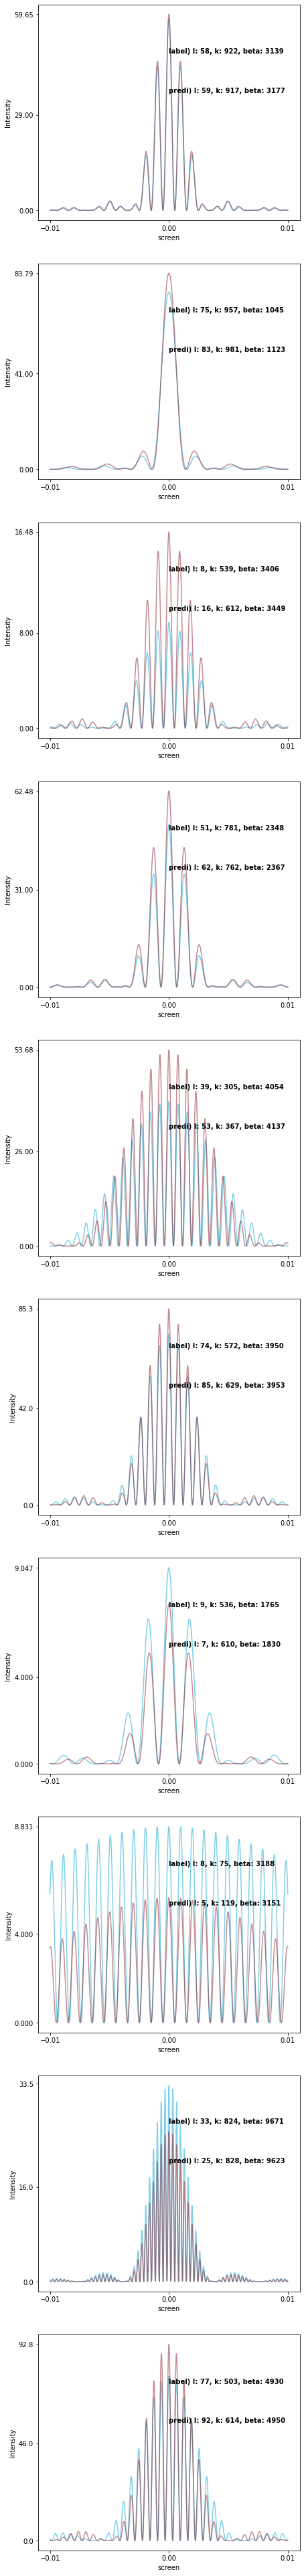

In [ ]:
# test

def data(I, k, beta):
  global x
  return I*(np.sin(k*x)/k/x)**2*(np.cos(beta*x))**2

if __name__=="__main__":
  x_size=1000; TrainN=10000; validN=50; testN=10
  x=np.linspace(-1e-2, 1e-2, x_size)
  # Eval
  model.eval()
  I1=np.random.uniform(0, 1e2, testN)
  k1=np.random.uniform(0, 1e3, testN)
  beta1=np.random.uniform(0, 1e4, testN)

  plt.figure(figsize=(7, 7*testN))
  for i in range(testN):
    label_test=torch.tensor([I1[i], k1[i], beta1[i]]).view(1, 3)
    attr_test=torch.tensor(data(I1[i], k1[i], beta1[i]), dtype=torch.float32)
    pred=model(attr_test)[0]

    plt.subplot(testN, 1, i+1)
    plt.plot(x, attr_test, color="#00a3d2", alpha=0.5)
    plt.plot(x, data(pred[0].detach(), pred[1].detach(), pred[2].detach()), color="#881824", alpha=0.5)
    plt.xlabel("screen"); plt.ylabel("Intensity")
    ylarge=np.max((I1[i], pred[0].detach()))
    plt.text(0, ylarge*(4/5), "label) I: %d, k: %d, beta: %d"%(I1[i], k1[i], beta1[i]), weight="bold")
    plt.text(0, ylarge*(3/5), "predi) I: %d, k: %d, beta: %d"%(pred[0], pred[1], pred[2]), weight="bold")
    plt.xticks([-1e-2, 0, 1e-2]); plt.yticks([0, ylarge//2, ylarge])
  
  plt.show()

<p>
<I>
학습에 상당히 많은 시간이 소모된다.<br/>
데이터의 정확한 수식을 알고 있기 때문에, 매 과정마다 임의의 가중치(unifrom distribution)를 만들고 이를 이용해서 학습을 시켰다. 학습의 복잡도를 최대한 줄이기 위해 I(1e2), k(1e3), beta(1e4)의 최대치를 정해놓고 데이터를 학습시키고 결과를 추출시켰다.<br/><br/>
학습과정에서 Validation Loss의 감소를 관측할 수 있었으며, 평가 데이터(임의로 추출한 랜덤 I, k, beta에 대해서도 상당히 유사하게 값을 예측한다고 결론을 내릴 수 있었다.<br/><br/>

모델이 예측해야 하는 값이 입력 데이터의 진동수와 관련이 있다는 것을 알 수 있기 때문에, 다양한 크기의 필터를 병렬로 연결시킨 모델을 사용하였다.<br/>
<I/>
</p>